# Линейная регрессия

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Датасет и его первичная обработка

Набором данных с признаками по недвижимости для предсказания ее стоимости с Kaggle: [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

Разбиваем на обучающую и тестовую выборки.

In [4]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

_train = pd.read_csv('./data/train.csv', index_col=0)

train, test = train_test_split(_train, test_size=0.2, random_state=67)

_train = pd.get_dummies(_train)

print(f'Размер train: {train.shape}')
print(f'Размер test: {test.shape}')

trainSize = train.shape[0]


Размер train: (1168, 80)
Размер test: (292, 80)


Описываем функции для выделения признаков и зависимой переменной.

In [5]:
def get_features_and_taget(data, column):
    return data.drop([column], axis=1).to_numpy(), data[column].to_numpy()

def get_features_df_and_taget(data, column):
    return data.drop([column], axis=1), data[column].to_numpy()

$\mathrm{SalePrice}$ -- наша зависимая переменная. Полное описание всех 79 признаков в данных можно посмотреть на [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Чтобы улучшить качествоваших прогнозов можно:

0. Перевести цену в логарифмическую шкалу.
1. Найти и удалить выбросы
2. Заполнить пропущенные значения
3. Добавить новые признаки


### 0. Логарифмируем SalePrice

In [6]:
train['SalePriceLn'] = np.log(train['SalePrice'])

### 1. Удаляем выбросы

Значение z-score +/- 3 будем рассматривать как выброс. Заодно посмотрим на скаттерплот признак/SalePriceLn.

In [7]:
train.shape[0]

1168

In [8]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Было  1168  осталось 1159 наблюдения


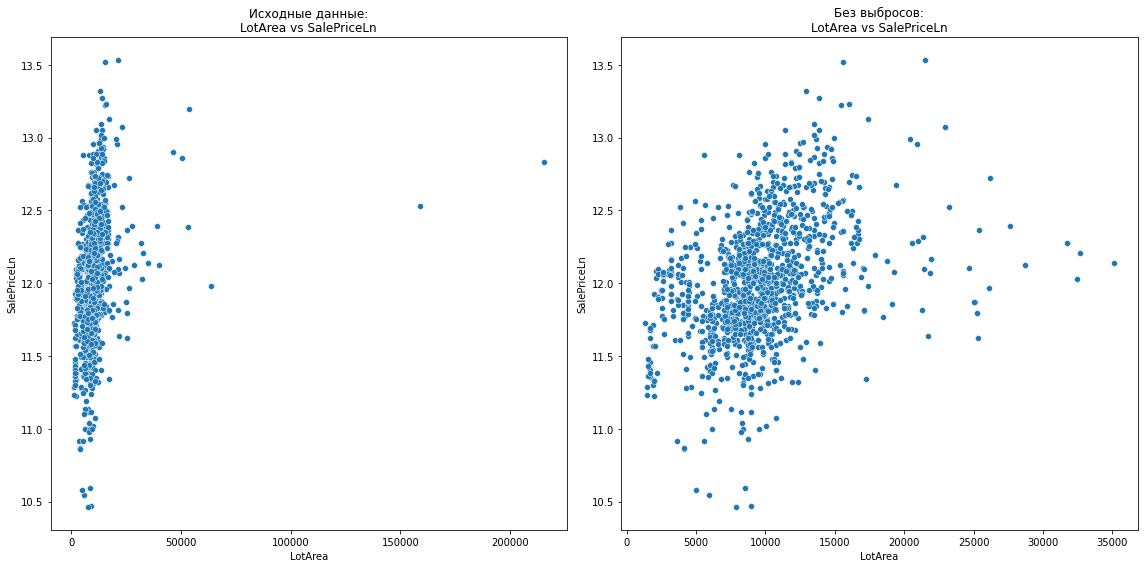

In [9]:

z_scores = stats.zscore(train['LotArea'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['LotArea'], y=train['SalePriceLn'])
plt.title('Исходные данные:\nLotArea vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['LotArea'], y=train['SalePriceLn'])
plt.title('Без выбросов:\nLotArea vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

Было  1168  осталось 1154 наблюдения


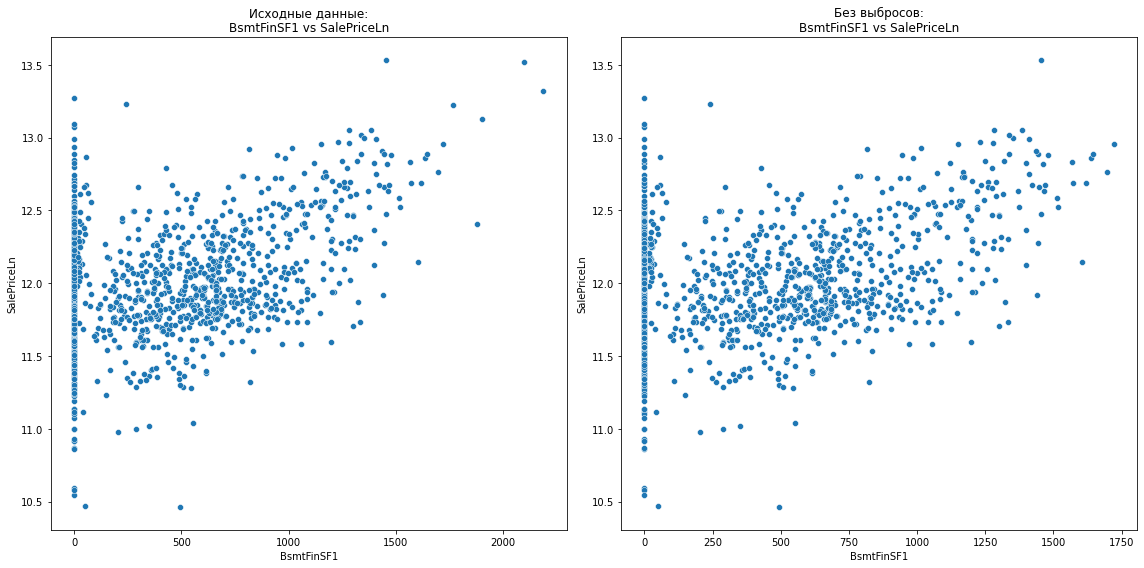

In [10]:
z_scores = stats.zscore(train['BsmtFinSF1'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['BsmtFinSF1'], y=train['SalePriceLn'])
plt.title('Исходные данные:\nBsmtFinSF1 vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['BsmtFinSF1'], y=train['SalePriceLn'])
plt.title('Без выбросов:\nBsmtFinSF1 vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

Было  1168  осталось 1145 наблюдения


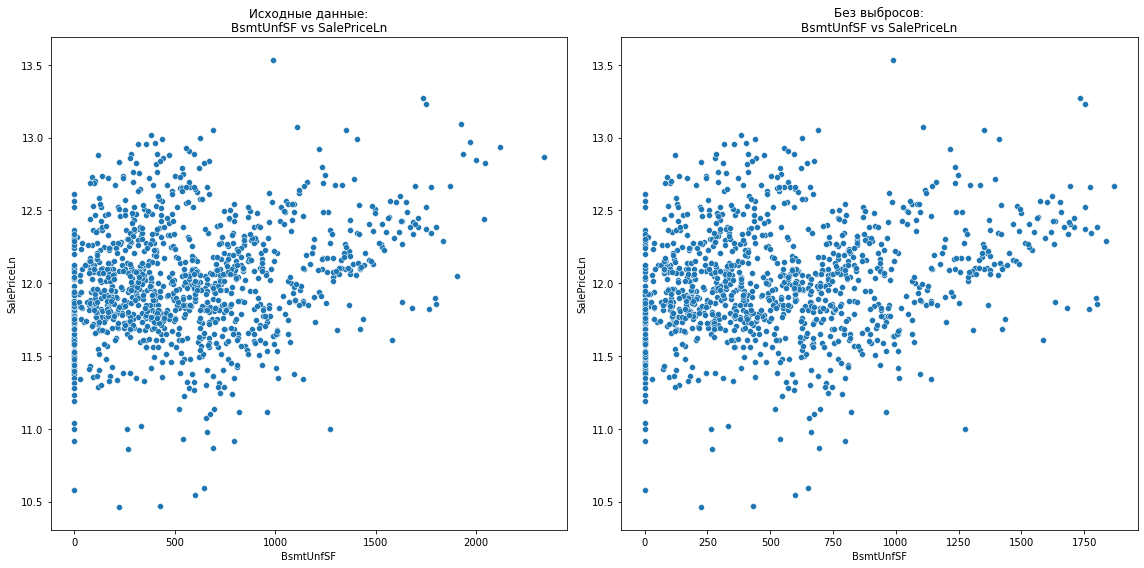

In [11]:
z_scores = stats.zscore(train['BsmtUnfSF'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['BsmtUnfSF'], y=train['SalePriceLn'])
plt.title('Исходные данные:\nBsmtUnfSF vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['BsmtUnfSF'], y=train['SalePriceLn'])
plt.title('Без выбросов:\nBsmtUnfSF vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

Было  1168  осталось 1141 наблюдения


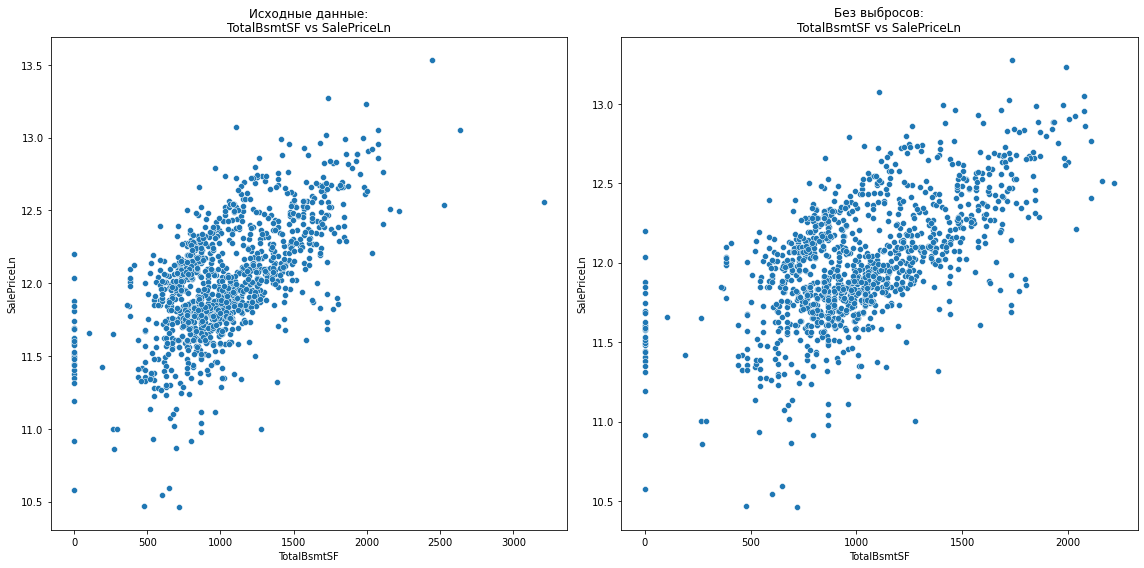

In [12]:
z_scores = stats.zscore(train['TotalBsmtSF'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['TotalBsmtSF'], y=train['SalePriceLn'])
plt.title('Исходные данные:\nTotalBsmtSF vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['TotalBsmtSF'], y=train['SalePriceLn'])
plt.title('Без выбросов:\nTotalBsmtSF vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

Было  1168  осталось 1136 наблюдения


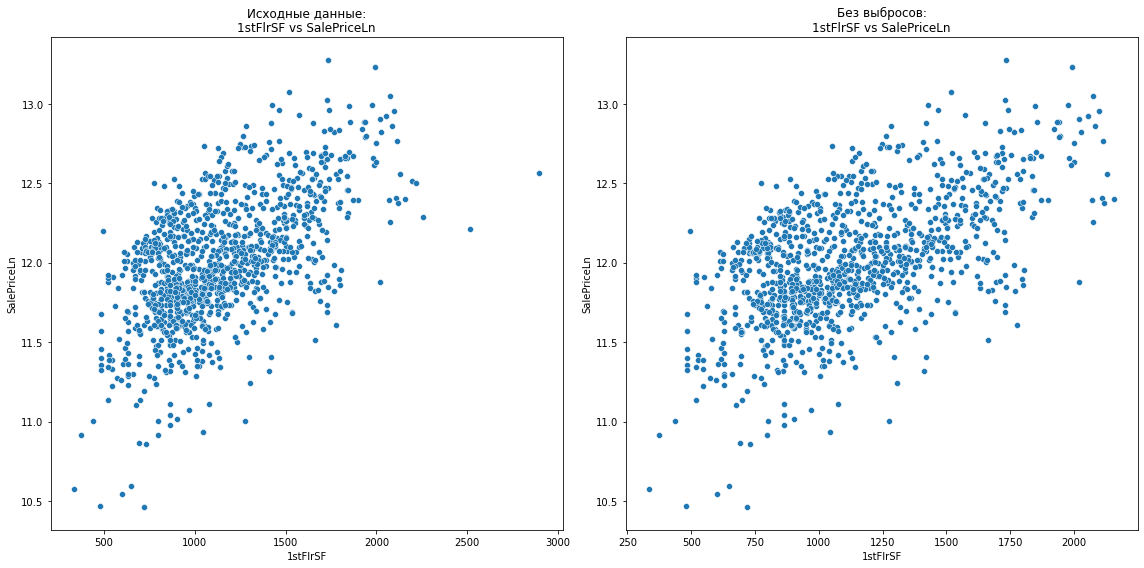

In [13]:
z_scores = stats.zscore(train['1stFlrSF'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['1stFlrSF'], y=train['SalePriceLn'])
plt.title('Исходные данные:\n1stFlrSF vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['1stFlrSF'], y=train['SalePriceLn'])
plt.title('Без выбросов:\n1stFlrSF vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

Было  1168  осталось 1136 наблюдения


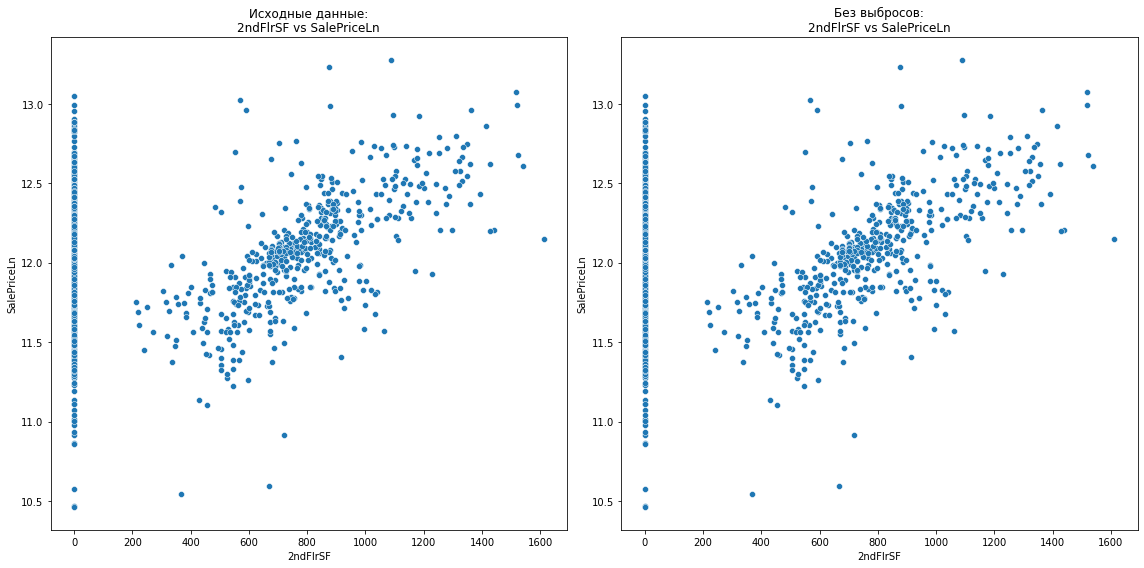

In [14]:
z_scores = stats.zscore(train['2ndFlrSF'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['2ndFlrSF'], y=train['SalePriceLn'])
plt.title('Исходные данные:\n2ndFlrSF vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['2ndFlrSF'], y=train['SalePriceLn'])
plt.title('Без выбросов:\n2ndFlrSF vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

Было  1168  осталось 1128 наблюдения


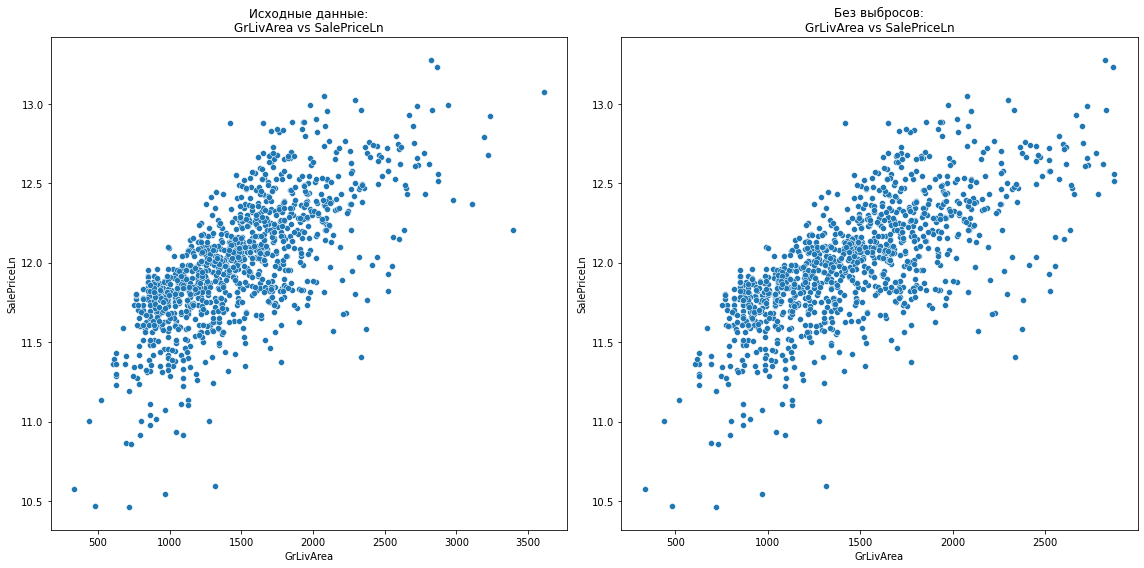

In [15]:
z_scores = stats.zscore(train['GrLivArea'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['GrLivArea'], y=train['SalePriceLn'])
plt.title('Исходные данные:\nGrLivArea vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['GrLivArea'], y=train['SalePriceLn'])
plt.title('Без выбросов:\nGrLivArea vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

Было  1168  осталось 1113 наблюдения


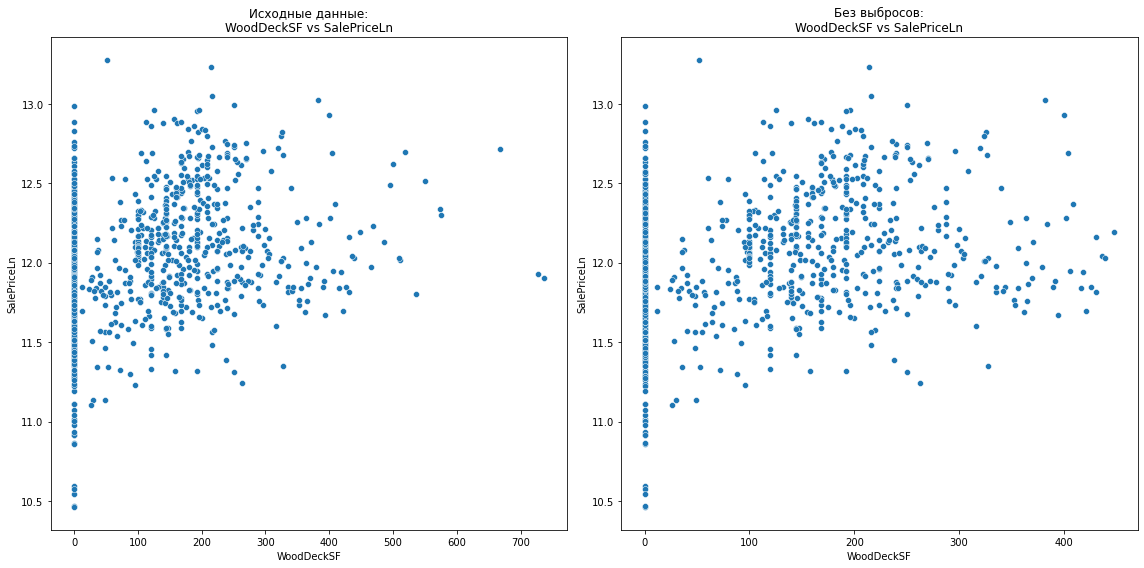

In [16]:
z_scores = stats.zscore(train['WoodDeckSF'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['WoodDeckSF'], y=train['SalePriceLn'])
plt.title('Исходные данные:\nWoodDeckSF vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['WoodDeckSF'], y=train['SalePriceLn'])
plt.title('Без выбросов:\nWoodDeckSF vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

Было  1168  осталось 1089 наблюдения


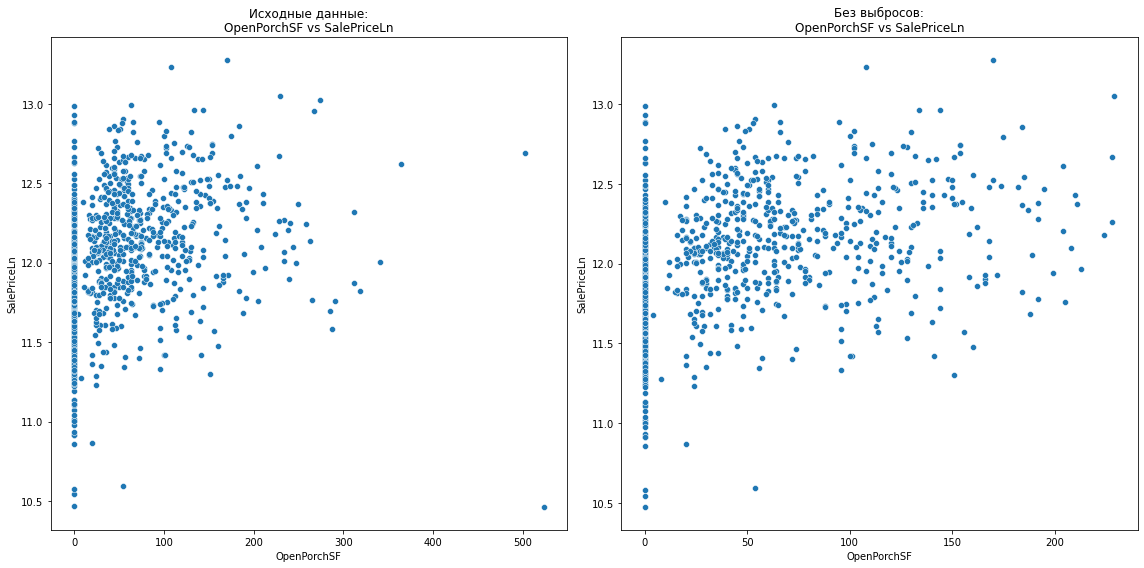

In [17]:
z_scores = stats.zscore(train['OpenPorchSF'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['OpenPorchSF'], y=train['SalePriceLn'])
plt.title('Исходные данные:\nOpenPorchSF vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['OpenPorchSF'], y=train['SalePriceLn'])
plt.title('Без выбросов:\nOpenPorchSF vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

### 2. Устраним NA

In [18]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      182
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
SalePriceLn        0
Length: 81, dtype: int64

Колонок слишком много, отсортируем по количеству пропусков по убыванию. 

In [19]:
sorted(dict(train.isnull().sum()).items(), key=lambda x: x[1], reverse=True)[:20]

[('PoolQC', 1086),
 ('MiscFeature', 1053),
 ('Alley', 1025),
 ('Fence', 876),
 ('FireplaceQu', 544),
 ('LotFrontage', 182),
 ('GarageType', 62),
 ('GarageYrBlt', 62),
 ('GarageFinish', 62),
 ('GarageQual', 62),
 ('GarageCond', 62),
 ('BsmtExposure', 30),
 ('BsmtQual', 29),
 ('BsmtCond', 29),
 ('BsmtFinType1', 29),
 ('BsmtFinType2', 29),
 ('MasVnrType', 6),
 ('MasVnrArea', 6),
 ('Electrical', 1),
 ('MSSubClass', 0)]

Взглянем на описание данных из документации, где рекомендованы разные стратегии по заполнению пропущенных значений:

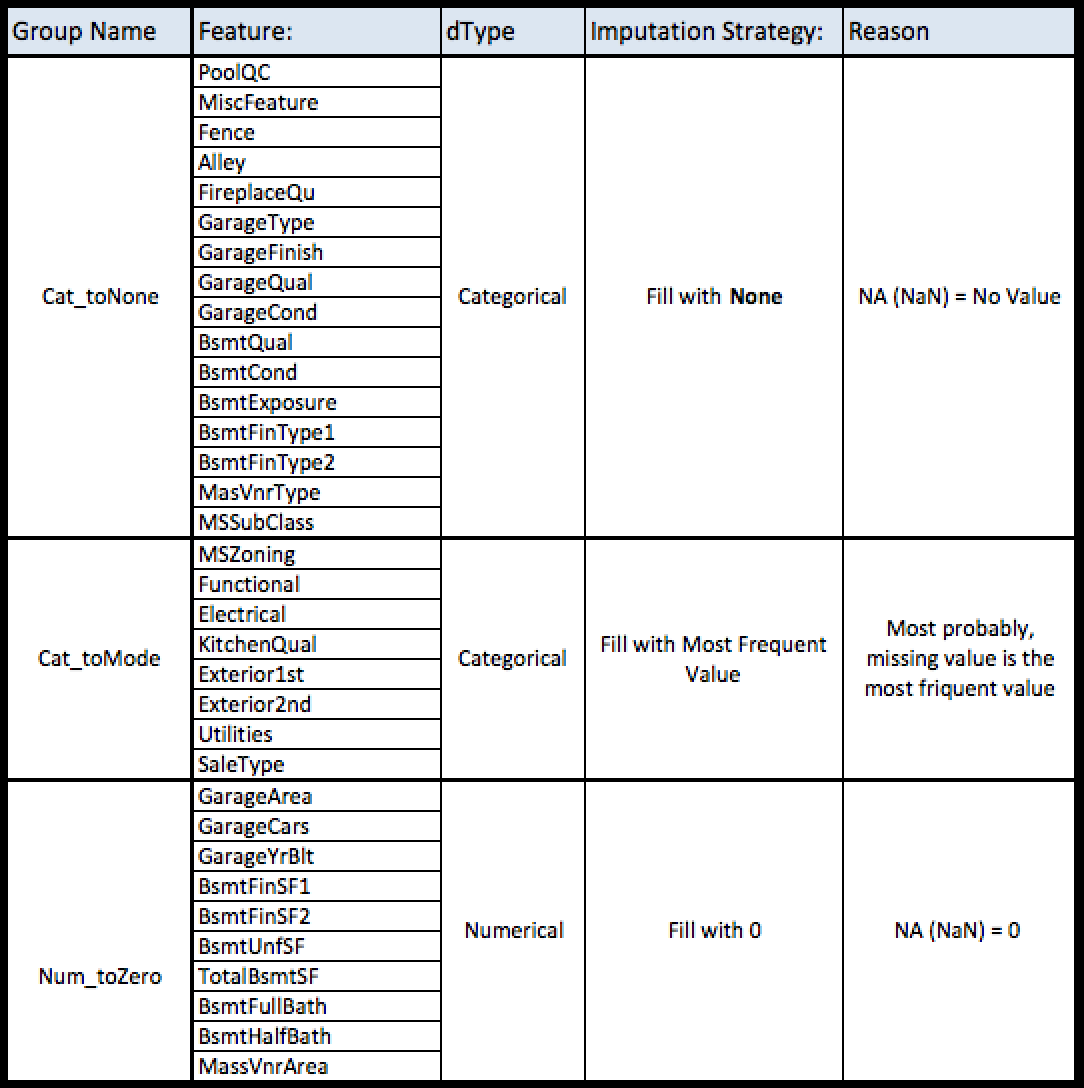

In [20]:
from IPython.display import Image
Image("./data/data_desc.png", height=800 , width=600)

Заполним пропущенные значения в соответствии со стратегиями выше:

In [21]:
cat_to_none = ('PoolQC', 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu', 'GarageType', 'GarageFinish',
              'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
              'BsmtFinType2', 'MasVnrType', 'MSSubClass')
    
cat_to_mode = ('MSZoning', 'Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd',
              'Utilities', 'SaleType')

num_to_zero = ('GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'MasVnrArea')

for col in cat_to_none:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

for col in cat_to_mode:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(train[col].mode()[0])

for col in num_to_zero:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)


Иногда лучше отсеивать выборсы после заполнения пропусков.

#### Удалим выбросы после заполнения пропусков 

Было  1168  осталось 1067 наблюдения


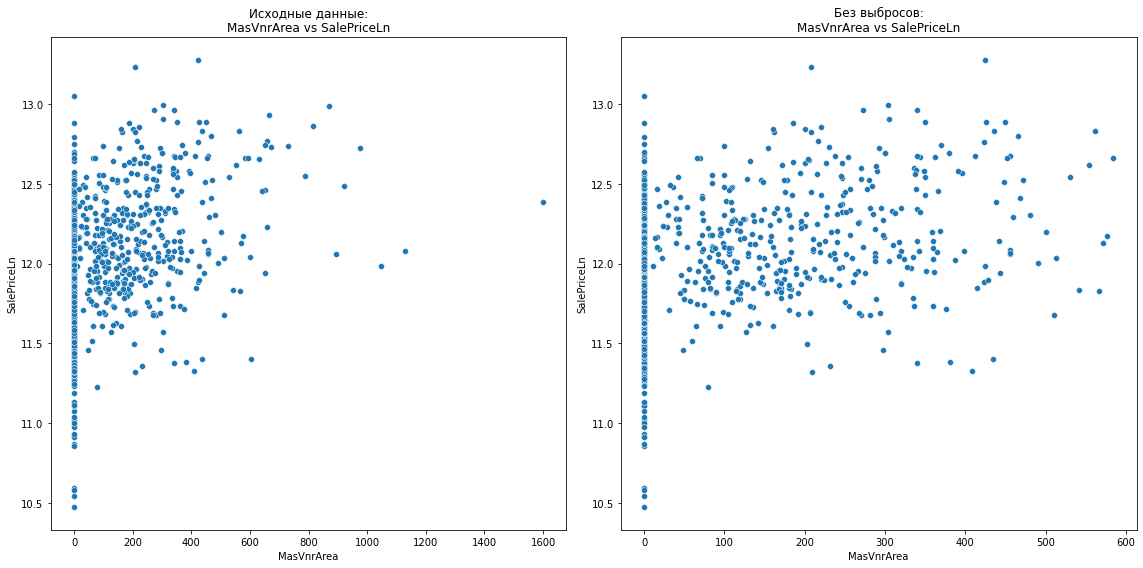

In [22]:
z_scores = stats.zscore(train['MasVnrArea'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['MasVnrArea'], y=train['SalePriceLn'])
plt.title('Исходные данные:\nMasVnrArea vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['MasVnrArea'], y=train['SalePriceLn'])
plt.title('Без выбросов:\nMasVnrArea vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

#### Продолжаем заполнять пропуски

* По переменной **LotFrontage** нужен дополнительный анализ

Поскольку LotFrontage - это расстояние до двора дома, мы можем сделать предположение, что оно зависит от района, в котором расположен дом. Таким образом, мы можем сгруппировать значения LotFrontage по признаку соседства и заменить отсутствующие значения на медианное расстояние LotFrontage по соседству.

In [23]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Было  1168  осталось 1058 наблюдения


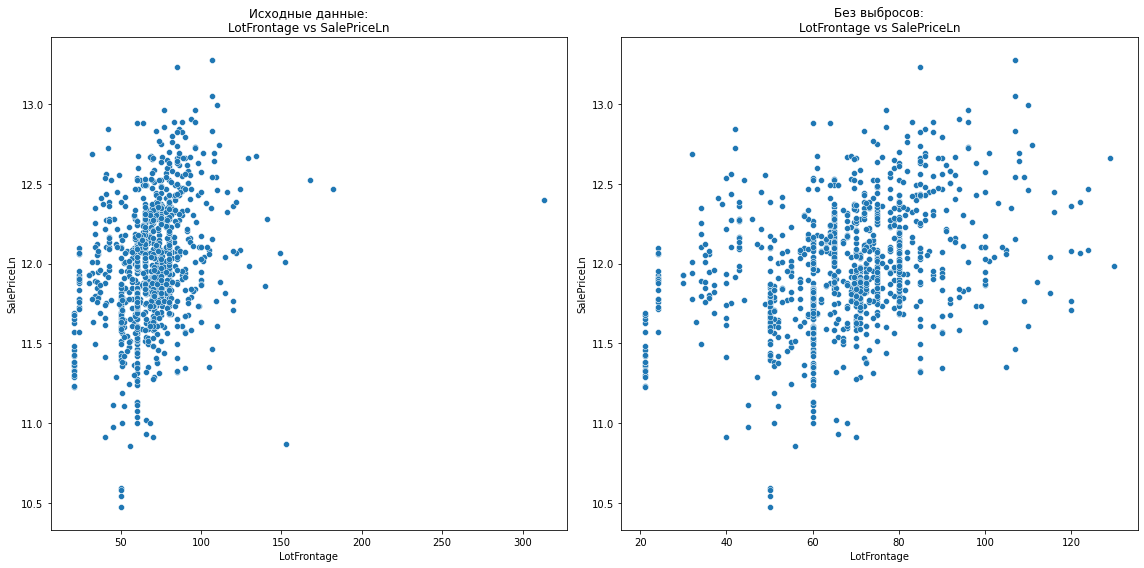

In [24]:
z_scores = stats.zscore(train['LotFrontage'])
train['z_score'] = np.abs(z_scores)
print('Было ', trainSize, ' осталось', train[train.z_score < 3].shape[0], 'наблюдения')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['LotFrontage'], y=train['SalePriceLn'])
plt.title('Исходные данные:\nLotFrontage vs SalePriceLn')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['LotFrontage'], y=train['SalePriceLn'])
plt.title('Без выбросов:\nLotFrontage vs SalePriceLn')
plt.tight_layout()

train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

Когда строили скаттерплоты, заметили признаки, которые могут не влиять на регрессию.

### Выделим подозрительные признаки

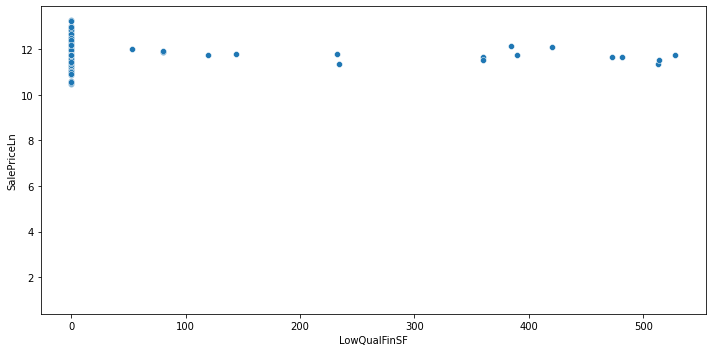

In [25]:
plt.figure(figsize=(10,5))
plt.plot(1, 2, 1)
sns.scatterplot(x=train['LowQualFinSF'], y=train['SalePriceLn'])

plt.tight_layout()

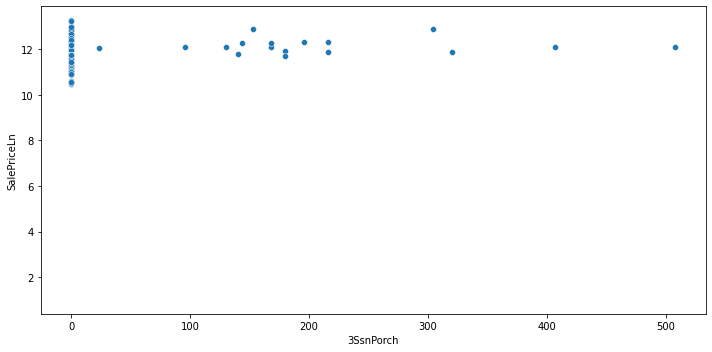

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(1, 2, 1)
sns.scatterplot(x=train['3SsnPorch'], y=train['SalePriceLn'])

plt.tight_layout()

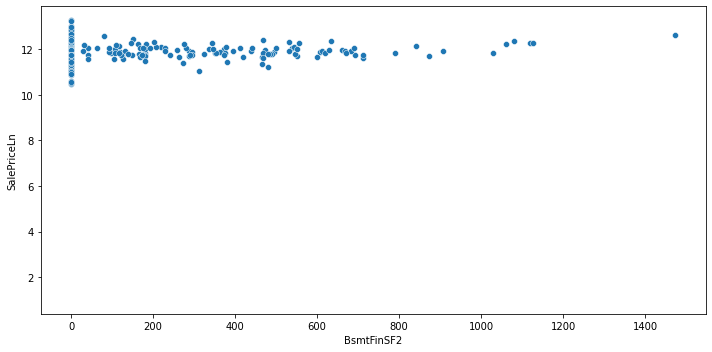

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(1, 2, 1)
sns.scatterplot(x=train['BsmtFinSF2'], y=train['SalePriceLn'])

plt.tight_layout()

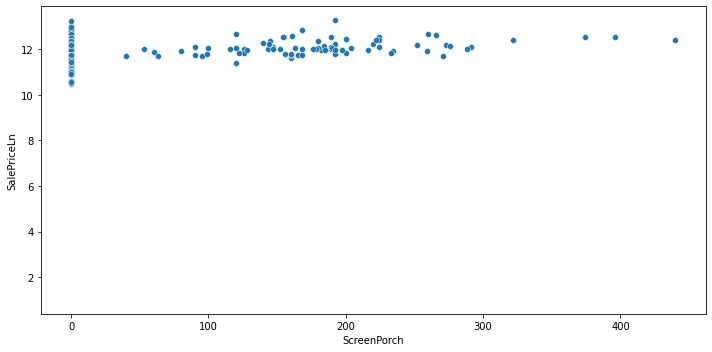

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(1, 2, 1)
sns.scatterplot(x=train['ScreenPorch'], y=train['SalePriceLn'])

plt.tight_layout()

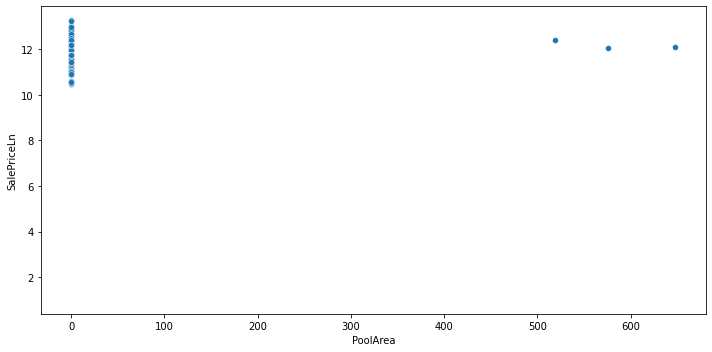

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(1, 2, 1)
sns.scatterplot(x=train['PoolArea'], y=train['SalePriceLn'])

plt.tight_layout()

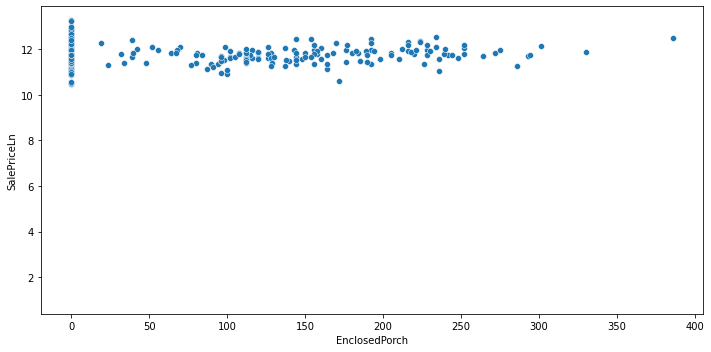

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(1, 2, 1)
sns.scatterplot(x=train['EnclosedPorch'], y=train['SalePriceLn'])

plt.tight_layout()

### 3. Добавить собственные признаки

Нужно сделать дамми переменные, потому что у нас куча категориальных признаков.

In [31]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train = train.reindex(_train.columns, axis=1, fill_value=0)
test = test.reindex(_train.columns, axis=1, fill_value=0)
print(train.shape)
print(test.shape)

(1058, 289)
(292, 289)


In [32]:
train['SalePriceLn'] = np.log(train['SalePrice'])

## Обычная модель


### Наивная модель

Начнем с обучения простой регрессии. 

In [33]:

train_data, validate_data = train_test_split(train, test_size=0.2, random_state=67)


X_train, Y_train = get_features_df_and_taget(train_data, "SalePriceLn")
X_train.drop('SalePrice', inplace=True, axis=1)

X_validate, Y_validate = get_features_df_and_taget(validate_data, "SalePriceLn")
X_validate.drop('SalePrice', inplace=True, axis=1)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_predicted = model.predict(X_train)
Y_validate_predicted = model.predict(X_validate)

from sklearn.metrics import r2_score, mean_squared_error

print("Train R-squared", r2_score(Y_train_predicted, Y_train))
print("Test R-squared", r2_score(Y_validate_predicted, Y_validate))
print("Train MSE", mean_squared_error(Y_train_predicted, Y_train))
print("Test MSE", mean_squared_error(Y_validate_predicted, Y_validate))

Train R-squared 0.945376871022587
Test R-squared 0.8755378709812383
Train MSE 0.0071674096870979675
Test MSE 0.019512094826121616


### Модификация нашей модели

Удалим признаки, мешающие обучению.

In [34]:
train.drop('3SsnPorch', inplace=True, axis=1)
train.drop('BsmtFinSF2', inplace=True, axis=1)

In [73]:
train_data, validate_data = train_test_split(train, test_size=0.2, random_state=67)

X_train, Y_train = get_features_df_and_taget(train_data, "SalePriceLn")
X_train.drop('SalePrice', inplace=True, axis=1)

X_validate, Y_validate = get_features_df_and_taget(validate_data, "SalePriceLn")
X_validate.drop('SalePrice', inplace=True, axis=1)

model = LinearRegression()
model.fit(X_train, Y_train)


Y_train_predicted = model.predict(X_train)
Y_validate_predicted = model.predict(X_validate)

from sklearn.metrics import r2_score, mean_squared_error

print("Train R-squared", r2_score(Y_train_predicted, Y_train))
print("Test R-squared", r2_score(Y_validate_predicted, Y_validate))
print("Train MSE", mean_squared_error(Y_train_predicted, Y_train))
print("Test MSE", mean_squared_error(Y_validate_predicted, Y_validate))

Train R-squared 0.9450192626163929
Test R-squared 0.8768773792705349
Train MSE 0.007211888055140436
Test MSE 0.019274493872575817


#### CV

Для красоты запустим cross-validate. 

In [36]:
from sklearn.model_selection import cross_validate

cross_validate(model, X_train, Y_train, cv=10)

{'fit_time': array([0.10693717, 0.10493016, 0.0959394 , 0.10793853, 0.09294653,
        0.1459136 , 0.06812549, 0.06995797, 0.0853796 , 0.22686648]),
 'score_time': array([0.00899553, 0.01599455, 0.0079937 , 0.00899458, 0.00999618,
        0.0059998 , 0.00499582, 0.00599718, 0.00699449, 0.01499176]),
 'test_score': array([0.79666519, 0.83714191, 0.88302479, 0.86942321, 0.86611698,
        0.87771967, 0.89830062, 0.873664  , 0.71906011, 0.82760495])}

## Регуляризация

Вроде всё хорошо, но вдруг переобучение уже есть? Давайте проверим. **Тут важно стандартизировать все признаки**.

In [37]:
from sklearn.preprocessing import StandardScaler

In [75]:
train_data, validate_data = train_test_split(train, test_size=0.2, random_state=67)

X_train, Y_train = get_features_df_and_taget(train_data, "SalePriceLn")
X_train.drop('SalePrice', inplace=True, axis=1)

X_validate, Y_validate = get_features_df_and_taget(validate_data, "SalePriceLn")
X_validate.drop('SalePrice', inplace=True, axis=1)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_validate = scaler_x.transform(X_validate)

from sklearn.linear_model import ElasticNet, Lasso, Ridge

# We scale target just for more "usual" alpha values
scaler_y = StandardScaler()
Y_train = scaler_y.fit_transform(Y_train.reshape((-1,1))).reshape(-1) #fir_transform ~~ fit().transform()
Y_validate = scaler_y.transform(Y_validate.reshape((-1,1))).reshape(-1)

model = Lasso(alpha=0.001) # just change me to any other model
model.fit(X_train, Y_train)

Y_train_predicted = model.predict(X_train)
Y_validate_predicted = model.predict(X_validate)

print("Train R-squared", r2_score(Y_train_predicted, Y_train))
print("Test R-squared", r2_score(Y_validate_predicted, Y_validate))
print("Train MSE", mean_squared_error(Y_train_predicted, Y_train))
print("Test MSE", mean_squared_error(Y_validate_predicted, Y_validate))

Train R-squared 0.9434587757191374
Test R-squared 0.8886421636423093
Train MSE 0.05307531460462839
Test MSE 0.12257960055825758


In [76]:
model = Ridge(alpha=14) # just change me to any other model
model.fit(X_train, Y_train)

Y_train_predicted = model.predict(X_train)
Y_validate_predicted = model.predict(X_validate)

print("Train R-squared", r2_score(Y_train_predicted, Y_train))
print("Test R-squared", r2_score(Y_validate_predicted, Y_validate))
print("Train MSE", mean_squared_error(Y_train_predicted, Y_train))
print("Test MSE", mean_squared_error(Y_validate_predicted, Y_validate))

Train R-squared 0.9438888677686341
Test R-squared 0.8844812696763077
Train MSE 0.052747273479979574
Test MSE 0.1271663710312468


### Подберем оптималього параметра альфы!

Подсказка:
logspace(x): $10^x$

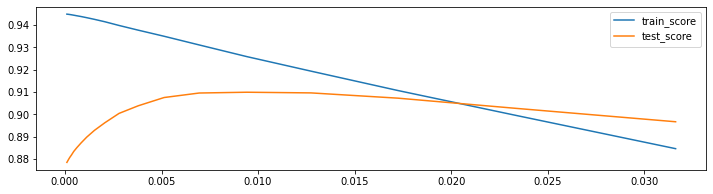

In [77]:
runs = []

for alpha in np.logspace(-4, -1.5, 20):

    model = Lasso(alpha=alpha) # change me between Ridge and Lasso
    model.fit(X_train, Y_train)

    Y_train_prediced = model.predict(X_train)
    Y_test_prediced = model.predict(X_validate)
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_prediced, Y_train),
        "test_score": r2_score(Y_test_prediced, Y_validate),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["train_score"] for run in runs], label="train_score")
plt.plot([run["alpha"] for run in runs], [run["test_score"] for run in runs], label="test_score")
plt.legend()
plt.show()


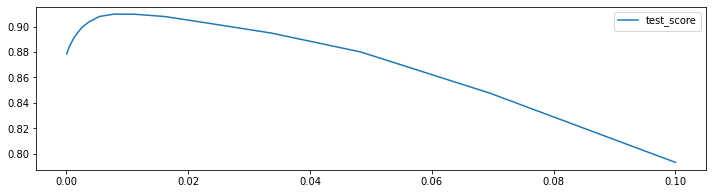

In [78]:
runs = []
for alpha in np.logspace(-4, -1, 20):

    model = Lasso(alpha=alpha) 
    model.fit(X_train, Y_train)

    Y_train_prediced = model.predict(X_train)
    Y_test_prediced = model.predict(X_validate)

    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_prediced, Y_train),
        "test_score": r2_score(Y_test_prediced, Y_validate),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["test_score"] for run in runs], label="test_score")
plt.legend()
plt.show()

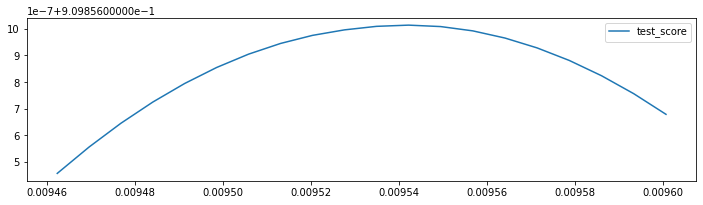

In [79]:
runs = []
for alpha in np.logspace(-2.024, -2.0177, 20):

    model = Lasso(alpha=alpha) 
    model.fit(X_train, Y_train)

    Y_train_prediced = model.predict(X_train)
    Y_test_prediced = model.predict(X_validate)

    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_prediced, Y_train),
        "test_score": r2_score(Y_test_prediced, Y_validate),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["test_score"] for run in runs], label="test_score")
plt.legend()
plt.show()

Попробуем $\mathrm{Lasso}$ при $\alpha = 0.00954$.

In [80]:
model = Lasso(alpha=0.00954) 
model.fit(X_train, Y_train)

Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_validate)

print("Train R-squared", r2_score(Y_train_predicted, Y_train))
print("Test R-squared", r2_score(Y_test_predicted, Y_validate))
print("Train MSE", mean_squared_error(Y_train_prediced, Y_train))
print("Test MSE", mean_squared_error(Y_test_prediced, Y_validate))

Train R-squared 0.925552883306329
Test R-squared 0.9098570139187434
Train MSE 0.06617124797042881
Test MSE 0.08581857464396592


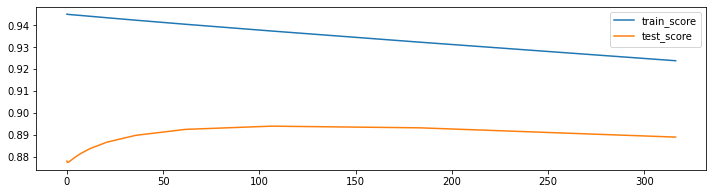

In [81]:
runs = []

for alpha in np.logspace(-2, 2.5, 20):

    model = Ridge(alpha=alpha) # change me between Ridge and Lasso
    model.fit(X_train, Y_train)

    Y_train_prediced = model.predict(X_train)
    Y_test_prediced = model.predict(X_validate)
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_prediced, Y_train),
        "test_score": r2_score(Y_test_prediced, Y_validate),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["train_score"] for run in runs], label="train_score")
plt.plot([run["alpha"] for run in runs], [run["test_score"] for run in runs], label="test_score")
plt.legend()
plt.show()


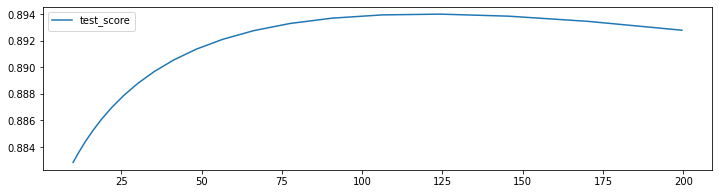

In [82]:
runs = []

for alpha in np.logspace(1, 2.3, 20):

    model = Ridge(alpha=alpha) # change me between Ridge and Lasso
    model.fit(X_train, Y_train)

    Y_train_prediced = model.predict(X_train)
    Y_test_prediced = model.predict(X_validate)
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_prediced, Y_train),
        "test_score": r2_score(Y_test_prediced, Y_validate),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["test_score"] for run in runs], label="test_score")
plt.legend()
plt.show()


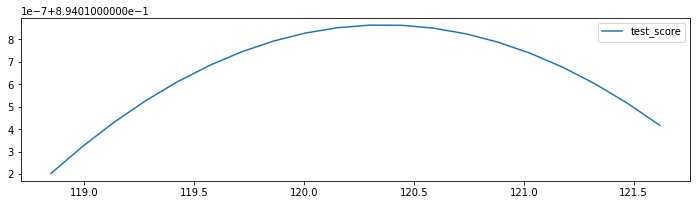

In [83]:
runs = []

for alpha in np.logspace(2.075, 2.085, 20):

    model = Ridge(alpha=alpha) # change me between Ridge and Lasso
    model.fit(X_train, Y_train)

    Y_train_prediced = model.predict(X_train)
    Y_test_prediced = model.predict(X_validate)
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_prediced, Y_train),
        "test_score": r2_score(Y_test_prediced, Y_validate),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["test_score"] for run in runs], label="test_score")
plt.legend()
plt.show()


Пробуем $\mathrm{Ridge}$ при $\alpha=120.4$.

In [84]:
model = Ridge(alpha=120.4)
model.fit(X_train, Y_train)

Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_validate)

print("Train R-squared", r2_score(Y_train_predicted, Y_train))
print("Test R-squared", r2_score(Y_test_predicted, Y_validate))
print("Train MSE", mean_squared_error(Y_train_prediced, Y_train))
print("Test MSE", mean_squared_error(Y_test_prediced, Y_validate))

Train R-squared 0.9363783403816655
Test R-squared 0.8940108632896596
Train MSE 0.0575743176584627
Test MSE 0.10599664566314619


## 3. Кросс-валидация
 
 
Предположим, мы подобрали оптимальный параметр. **А чтоб если мы бы разбили выборку по-другому?** 

In [85]:
from sklearn.model_selection import cross_validate

X_train, Y_train = get_features_df_and_taget(train, "SalePriceLn")
X_train.drop('SalePrice', inplace=True, axis=1)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_validate = scaler_x.transform(X_validate)


# We scale target just for more "usual" alpha values
scaler_y = StandardScaler()
Y_train = scaler_y.fit_transform(Y_train.reshape((-1,1))).reshape(-1) #fir_transform ~~ fit().transform()
Y_validate = scaler_y.transform(Y_validate.reshape((-1,1))).reshape(-1)

model = Lasso(alpha=0.00954)
cv_results = cross_validate(model, X_train, Y_train, cv=10)
cv_results

{'fit_time': array([0.03597903, 0.02498651, 0.0219872 , 0.03098154, 0.01898909,
        0.01698923, 0.01698995, 0.01798892, 0.01798987, 0.01699018]),
 'score_time': array([0.00100017, 0.00300956, 0.        , 0.        , 0.        ,
        0.00099993, 0.00099969, 0.00099802, 0.        , 0.00099993]),
 'test_score': array([0.93032483, 0.92814828, 0.9181246 , 0.89844177, 0.91098398,
        0.81634926, 0.91259965, 0.90318125, 0.94335847, 0.88936688])}

In [86]:
model = Ridge(alpha=120.4)
cv_results = cross_validate(model, X_train, Y_train, cv=10)
cv_results

{'fit_time': array([0.02900553, 0.01498628, 0.01299262, 0.01699018, 0.01299167,
        0.14791346, 0.01499128, 0.02597117, 0.01199341, 0.01499104]),
 'score_time': array([0.00197816, 0.00099945, 0.00200057, 0.        , 0.        ,
        0.00099921, 0.00999403, 0.00099969, 0.00099993, 0.00099921]),
 'test_score': array([0.92159042, 0.91776546, 0.90136222, 0.88198521, 0.89653302,
        0.80623184, 0.90217674, 0.8901203 , 0.94516273, 0.89085631])}

### Оптимальный выбор параметров с помощью кросс-валидации

Опишем функцию, которая принимает модель и ищет лучший параметр в смысле максимизации минимального результата на кросс-валидации.

In [87]:
def select_best_coeff(ModelMethod, X, Y, left_bound, right_bound, amount, cv):
    model = LinearRegression()
    maxmin = cross_validate(model, X, Y, cv=cv)['test_score'].min()
    bestAlpha = 0

    for alpha in np.logspace(left_bound, right_bound, amount):

        model = ModelMethod(alpha=alpha) 
        newMin = cross_validate(model, X, Y, cv=cv)['test_score'].min()
        if(newMin > maxmin):
            maxmin = newMin
            bestAlpha = alpha
    
    return(bestAlpha)


In [88]:
bestLassoAlpha = select_best_coeff(Lasso, X_train, Y_train, -4, 2, 200, 10)
model = Lasso(alpha=bestLassoAlpha) 
cross_validate(model, X_train, Y_train, cv=10)

{'fit_time': array([0.01998711, 0.02098727, 0.02498674, 0.01797199, 0.01897192,
        0.02297258, 0.01900125, 0.0179913 , 0.02096844, 0.02000403]),
 'score_time': array([0.00101566, 0.        , 0.00101566, 0.0010016 , 0.0010159 ,
        0.        , 0.00098372, 0.00099945, 0.00100064, 0.00098395]),
 'test_score': array([0.93024765, 0.92838287, 0.91531941, 0.89812736, 0.90696386,
        0.8168455 , 0.91171934, 0.90046922, 0.94553636, 0.89013614])}

In [89]:
bestRidgeAlpha = select_best_coeff(Ridge, X_train, Y_train, -4, 2, 200, 10)
model = Ridge(alpha=bestRidgeAlpha) 
cross_validate(model, X_train, Y_train, cv=10)

{'fit_time': array([0.01199436, 0.02098751, 0.01299047, 0.01199269, 0.01399279,
        0.01499057, 0.00799322, 0.01299214, 0.0129931 , 0.01199365]),
 'score_time': array([0.00099778, 0.00100136, 0.0010004 , 0.00099897, 0.00099921,
        0.        , 0.00099945, 0.00099945, 0.00099921, 0.00099945]),
 'test_score': array([0.92153392, 0.91672686, 0.89932574, 0.88212067, 0.89344234,
        0.80600258, 0.90168578, 0.88845428, 0.94464015, 0.88948683])}

In [90]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV

elastic_cv_pipeline = make_pipeline(StandardScaler(), ElasticNetCV(l1_ratio=0.1))
elastic_cv_pipeline.fit(X_train, Y_train)
print(elastic_cv_pipeline[1].alpha_)

model = ElasticNet(alpha=elastic_cv_pipeline[1].alpha_, ) 
cross_validate(model, X_train, Y_train, cv=10)

0.08190351454554938


{'fit_time': array([0.01597452, 0.01500773, 0.01499081, 0.01599145, 0.0150075 ,
        0.01399231, 0.01498961, 0.01399207, 0.0179913 , 0.01898766]),
 'score_time': array([0.        , 0.0012815 , 0.00099945, 0.000983  , 0.00075364,
        0.00082183, 0.00100064, 0.        , 0.0009973 , 0.0010004 ]),
 'test_score': array([0.90917089, 0.91059095, 0.91240772, 0.87025781, 0.90861238,
        0.78262293, 0.9044299 , 0.90864833, 0.90817146, 0.83780108])}

Также опишем функцию, которая подбирает оптимальные параметры для Elastic Net модели.

In [91]:
def select_best_coeff_elastic(X, Y, amount, cv):
    model = LinearRegression()
    maxmin = cross_validate(model, X, Y, cv=cv)['test_score'].min()
    bestAlpha = 0
    bestL1ratio = 0

    for l1_ratio in np.linspace(0.01, 1, amount):
        elastic_cv_pipeline = make_pipeline(StandardScaler(), ElasticNetCV(l1_ratio=l1_ratio))
        elastic_cv_pipeline.fit(X_train, Y_train)
        alpha=elastic_cv_pipeline[1].alpha_
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio) 
        cv_results = cross_validate(model, X, Y, cv=cv)
        newMin = cv_results['test_score'].min()
        if(newMin > maxmin):
            maxmin = newMin
            bestAlpha = alpha
            bestL1ratio = l1_ratio
    
    return(bestAlpha, bestL1ratio)


In [92]:
bestAlpha, bestRatio = select_best_coeff_elastic(X_train, Y_train, 500, 10)
model = ElasticNet(alpha=bestAlpha, l1_ratio=bestRatio) 

In [93]:
cross_validate(model, X_train, Y_train, cv=10)

{'fit_time': array([0.02998328, 0.01998925, 0.0209918 , 0.02198744, 0.01899004,
        0.02498555, 0.01698971, 0.01541853, 0.01897144, 0.01599097]),
 'score_time': array([0.0009985 , 0.00100064, 0.00099468, 0.00099993, 0.00101066,
        0.0010004 , 0.0010004 , 0.00101995, 0.        , 0.        ]),
 'test_score': array([0.93022166, 0.9272088 , 0.91910078, 0.89794824, 0.91359571,
        0.8156855 , 0.91318238, 0.90517286, 0.94159802, 0.88822921])}

In [419]:
bestAlpha, bestRatio

(0.0235273689862385, 0.13895791583166334)

## Feature selection

### FSFS

Библиотека

In [421]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

* $\mathrm{k\_features}$ -- сколько признаков оставить,
* $\mathrm{forward}$ (bool) -- направление,
* $\mathrm{scoring}$ -- оценка,
* $\mathrm{cv}$ -- разбить на ... кросс-валидации,
* $\mathrm{n\_jobs}$ -- многопоток (-1 -- все доступные, по умолчанию: 1).

In [425]:
model = LinearRegression()

sfs = SFS(model, 
          k_features=286, 
          forward=True, 
          scoring='r2',
          cv=10,
          n_jobs=-1)

In [427]:
sfs = sfs.fit(X_train, Y_train)

resultTable = pd.DataFrame.from_dict(sfs.get_metric_dict()).T


In [428]:
resultTable['minScore'] = list(map(lambda x: x.min() , resultTable['cv_scores']))

In [429]:
resultTable.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,minScore
1,"(3,)","[0.7159908572418057, 0.7275876956306921, 0.628...",0.669312,"(OverallQual,)",0.041571,0.055972,0.018657,0.564287
2,"(3, 14)","[0.7894435762429011, 0.7996691581997374, 0.692...",0.746548,"(OverallQual, GrLivArea)",0.042117,0.056707,0.018902,0.629457
3,"(3, 5, 14)","[0.7930191950053508, 0.8283303143685626, 0.778...",0.793537,"(OverallQual, YearBuilt, GrLivArea)",0.035119,0.047285,0.015762,0.688934
4,"(3, 5, 8, 14)","[0.8224452423494368, 0.8370542951298088, 0.837...",0.828062,"(OverallQual, YearBuilt, BsmtFinSF1, GrLivArea)",0.033131,0.044608,0.014869,0.717463
5,"(3, 4, 5, 8, 14)","[0.8372915607477576, 0.8594389404512367, 0.883...",0.848555,"(OverallQual, OverallCond, YearBuilt, BsmtFinS...",0.03036,0.040877,0.013626,0.744778


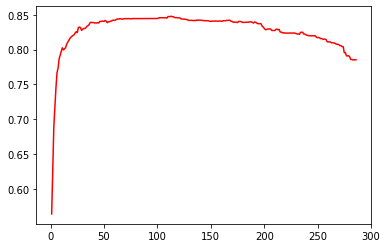

In [431]:
plt.plot(range(1,287), resultTable['minScore'], color="red")

plt.show()

In [432]:
resultTable.iloc[resultTable['minScore'].argmax()]

feature_idx      (2, 3, 4, 5, 6, 8, 9, 10, 14, 15, 18, 24, 25, ...
cv_scores        [0.9376719138856335, 0.9364566246572062, 0.940...
avg_score                                                 0.922996
feature_names    (LotArea, OverallQual, OverallCond, YearBuilt,...
ci_bound                                                  0.020543
std_dev                                                   0.027659
std_err                                                    0.00922
minScore                                                  0.847881
Name: 113, dtype: object

In [433]:
X_fsfsTrain = X_train[list(resultTable.iloc[resultTable['minScore'].argmax()].feature_names)]
X_fsfsTrain.shape

(1058, 113)

In [435]:
bestAlpha, bestRatio = select_best_coeff_elastic(X_fsfsTrain, Y_train, 500, 10)
model = ElasticNet(alpha=bestAlpha, l1_ratio=bestRatio) 
cross_validate(model, X_fsfsTrain, Y_train, cv=10)

{'fit_time': array([0.12897515, 0.13125443, 0.1343286 , 0.12762618, 0.12849021,
        0.12384391, 0.12629652, 0.13092589, 0.13186002, 0.13893604]),
 'score_time': array([0.0020287 , 0.0239327 , 0.00780463, 0.00602508, 0.00759697,
        0.00803137, 0.00603056, 0.00550413, 0.02296519, 0.00500393]),
 'test_score': array([0.93767191, 0.93645662, 0.9402036 , 0.9201958 , 0.93354993,
        0.84788066, 0.92444138, 0.92389227, 0.9551903 , 0.91047982])}

In [436]:
bestAlpha = select_best_coeff(Lasso, X_fsfsTrain, Y_train, -2, 2, 100, 10)
model = Lasso(alpha=bestAlpha) 
cross_validate(model, X_fsfsTrain, Y_train, cv=10)

{'fit_time': array([0.1128881 , 0.12874317, 0.1302073 , 0.12964749, 0.11925173,
        0.12909722, 0.12920451, 0.14017773, 0.14391899, 0.22587061]),
 'score_time': array([0.00799298, 0.00899529, 0.008008  , 0.00899577, 0.00901222,
        0.00799561, 0.00799584, 0.0089941 , 0.03298116, 0.01399231]),
 'test_score': array([0.93767191, 0.93645662, 0.9402036 , 0.9201958 , 0.93354993,
        0.84788066, 0.92444138, 0.92389227, 0.9551903 , 0.91047982])}

In [437]:
bestAlpha = select_best_coeff(Ridge, X_fsfsTrain, Y_train, -2, 2, 100, 10)
model = Ridge(alpha=bestAlpha) 
cross_validate(model, X_fsfsTrain, Y_train, cv=10)

{'fit_time': array([0.01301193, 0.01627707, 0.01402593, 0.01436687, 0.01129866,
        0.01459718, 0.01650262, 0.01508331, 0.01199412, 0.01433897]),
 'score_time': array([0.01127791, 0.008991  , 0.01199365, 0.00948644, 0.00954652,
        0.00925016, 0.00934672, 0.00839281, 0.01011753, 0.00805974]),
 'test_score': array([0.93703727, 0.93707285, 0.94222191, 0.91910915, 0.93424617,
        0.84796221, 0.92471919, 0.92471316, 0.95476739, 0.91060465])}

In [443]:
alpha, ratio = 0.0235273689862385, 0.13895791583166334

model = ElasticNet(alpha=alpha, l1_ratio = ratio)

sfs = SFS(model, 
          k_features=286, 
          forward=True, 
          scoring='r2',
          cv=10,
          n_jobs=-1)

sfs = sfs.fit(X_train, Y_train)

resultTable = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

resultTable['minScore'] = list(map(lambda x: x.min() , resultTable['cv_scores']))

resultTable.head()


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,minScore
1,"(3,)","[0.7167560963474908, 0.7277319803407041, 0.630...",0.669264,"(OverallQual,)",0.04152,0.055903,0.018634,0.563372
2,"(3, 14)","[0.7902101831565846, 0.7991857092668417, 0.693...",0.746305,"(OverallQual, GrLivArea)",0.04231,0.056967,0.018989,0.626499
3,"(3, 5, 14)","[0.7910756478945269, 0.8275606078095135, 0.779...",0.793324,"(OverallQual, YearBuilt, GrLivArea)",0.035121,0.047288,0.015763,0.687099
4,"(3, 5, 8, 14)","[0.8212473972143014, 0.8369634236654431, 0.838...",0.827877,"(OverallQual, YearBuilt, BsmtFinSF1, GrLivArea)",0.033685,0.045354,0.015118,0.714250
5,"(3, 4, 5, 8, 14)","[0.8374285778610593, 0.8596987961489914, 0.882...",0.848415,"(OverallQual, OverallCond, YearBuilt, BsmtFinS...",0.031272,0.042106,0.014035,0.740913


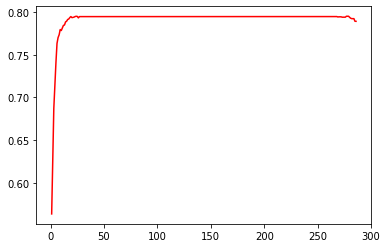

In [446]:
plt.plot(range(1,287), resultTable['minScore'], color="red")

plt.show()

In [447]:
resultTable.iloc[resultTable['minScore'].argmax()]

feature_idx      (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...
cv_scores        [0.9030605975226181, 0.9165242439897563, 0.925...
avg_score                                                 0.894429
feature_names    (MSSubClass, LotFrontage, LotArea, OverallQual...
ci_bound                                                  0.029974
std_dev                                                   0.040357
std_err                                                   0.013452
minScore                                                  0.795347
Name: 277, dtype: object

### PCA

In [96]:
train_data = train.copy()

X_train, Y_train = get_features_df_and_taget(train_data, "SalePriceLn")
X_train.drop('SalePrice', inplace=True, axis=1)

# X_validate, Y_validate = get_features_df_and_taget(validate_data, "SalePriceLn")
# X_validate.drop('SalePrice', inplace=True, axis=1)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
# X_validate = scaler_x.transform(X_validate)

scaler_y = StandardScaler()
Y_train = scaler_y.fit_transform(Y_train.reshape((-1,1))).reshape(-1) #fir_transform ~~ fit().transform()
# Y_validate = scaler_y.transform(Y_validate.reshape((-1,1))).reshape(-1)

from sklearn.decomposition import PCA
pca = PCA(.95)
X_train = pca.fit_transform(X_train)
# X_validate = pca.transform(X_validate)

model = LinearRegression()
model.fit(X_train, Y_train)

res = cross_validate(model, X_train, Y_train, cv=10)
res

{'fit_time': array([0.06895018, 0.05296922, 0.04697275, 0.0499692 , 0.0499711 ,
        0.04397368, 0.04697275, 0.0399766 , 0.04697275, 0.04497337]),
 'score_time': array([0.00099945, 0.00099993, 0.00100183, 0.00100017, 0.00099993,
        0.00100017, 0.00100613, 0.00099969, 0.00100064, 0.00100088]),
 'test_score': array([ 0.88242951,  0.8957102 ,  0.7159768 ,  0.87947374, -0.32212058,
        -0.53478288,  0.46101064, -2.14786728,  0.41067228,  0.8822871 ])}

In [38]:
X_train, Y_train = get_features_df_and_taget(train_data, "SalePriceLn")
X_train.drop('SalePrice', inplace=True, axis=1)
X_train.drop('3SsnPorch', inplace=True, axis=1)
X_train.drop('BsmtFinSF2', inplace=True, axis=1)

# X_validate, Y_validate = get_features_df_and_taget(validate_data, "SalePriceLn")
# X_validate.drop('SalePrice', inplace=True, axis=1)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
# X_validate = scaler_x.transform(X_validate)

scaler_y = StandardScaler()
Y_train = scaler_y.fit_transform(Y_train.reshape((-1,1))).reshape(-1) #fir_transform ~~ fit().transform()
# Y_validate = scaler_y.transform(Y_validate.reshape((-1,1))).reshape(-1)

from sklearn.decomposition import PCA
pca = PCA(.95)
X_train = pca.fit_transform(X_train)
# X_validate = pca.transform(X_validate)

model = LinearRegression()
model.fit(X_train, Y_train)

res = cross_validate(model, X_train, Y_train, cv=10)
res

{'fit_time': array([0.02898455, 0.02998304, 0.02898359, 0.03098202, 0.05196929,
        0.03297901, 0.02798176, 0.02798367, 0.0279851 , 0.02897382]),
 'score_time': array([0.00199819, 0.00100064, 0.        , 0.        , 0.00099993,
        0.00100088, 0.00099969, 0.0010004 , 0.00100088, 0.        ]),
 'test_score': array([-1.05852085,  0.86338666,  0.59259187,  0.25773822,  0.17517772,
         0.84696526,  0.71428181,  0.71716512,  0.29614474,  0.23678904])}

## Random forest

In [45]:
train_data, validate_data = train_test_split(train, test_size=0.2, random_state=67)
train_data.drop('3SsnPorch', inplace=True, axis=1)
train_data.drop('BsmtFinSF2', inplace=True, axis=1)
validate_data.drop('3SsnPorch', inplace=True, axis=1)
validate_data.drop('BsmtFinSF2', inplace=True, axis=1)


X_train, Y_train = get_features_df_and_taget(train_data, "SalePriceLn")
X_train.drop('SalePrice', inplace=True, axis=1)

X_validate, Y_validate = get_features_df_and_taget(validate_data, "SalePriceLn")
X_validate.drop('SalePrice', inplace=True, axis=1)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=67)
regressor.fit(X_train, Y_train)

print(r2_score(regressor.predict(X_train), Y_train))
print(mean_squared_error(regressor.predict(X_train), Y_train))
print(r2_score(regressor.predict(X_validate), Y_validate))
print(mean_squared_error(regressor.predict(X_validate), Y_validate))

KeyError: "['3SsnPorch'] not found in axis"

In [43]:
train_data, validate_data = train_test_split(train, test_size=0.2, random_state=67)

X_train, Y_train = get_features_df_and_taget(train_data, "SalePriceLn")
X_train.drop('SalePrice', inplace=True, axis=1)

X_validate, Y_validate = get_features_df_and_taget(validate_data, "SalePriceLn")
X_validate.drop('SalePrice', inplace=True, axis=1)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=67)
regressor.fit(X_train, Y_train)

print(r2_score(regressor.predict(X_train), Y_train))
print(mean_squared_error(regressor.predict(X_train), Y_train))
print(r2_score(regressor.predict(X_validate), Y_validate))
print(mean_squared_error(regressor.predict(X_validate), Y_validate))

846

# Результат

In [449]:
X_test, Y_test = get_features_df_and_taget(test, "SalePrice")
X_test = X_test[list(X_fsfsTrain.columns)]

In [453]:
model = LinearRegression()
model.fit(X_fsfsTrain, Y_train)

Y_test_predicted = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("Test R-squared in normal scale", r2_score(np.exp(Y_test_predicted), Y_test))
print("Test R-squaredin ln scale", r2_score(Y_test_predicted, np.log(Y_test)))
print("Test MSE in normal scale", mean_squared_error(np.exp(Y_test_predicted), Y_test))
print("Test MSE in ln scale", mean_squared_error(Y_test_predicted, np.log(Y_test)))

Test R-squared in normal scale 0.9000314191593292
Test R-squaredin ln scale 0.9097632084721682
Test MSE in normal scale 544112650.2522215
Test MSE in ln scale 0.01262758000259383
